## Cirq

In [3]:
import matplotlib.pyplot as plt 
import numpy as np

import cirq

In [4]:
q0 = cirq.NamedQubit("q0")
q1 = cirq.NamedQubit("q1")

In [5]:
circuit = cirq.Circuit(
    cirq.H(q0),
    cirq.CNOT(q0, q1),
    cirq.measure(q0, q1,key='measure_all')
)

In [6]:
print(circuit)

q0: ───H───@───M('measure_all')───
           │   │
q1: ───────X───M──────────────────


In [7]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions = 1024)

<AxesSubplot:title={'center':'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

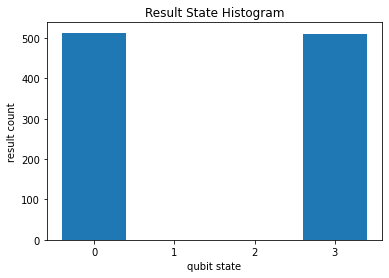

In [8]:
cirq.plot_state_histogram(result, plt.subplot())

<AxesSubplot:title={'center':'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

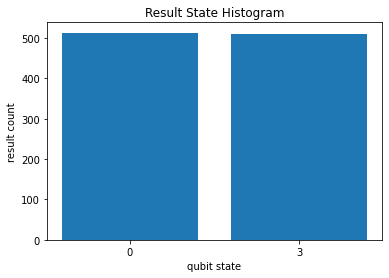

In [9]:
histogram = result.histogram(key ='measure_all')
cirq.plot_state_histogram(histogram, plt.subplot())

## Qiskit

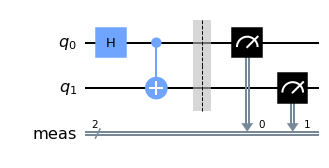

In [25]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')

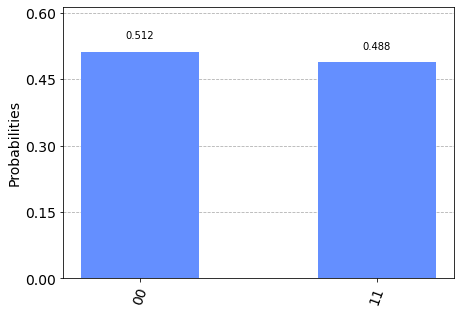

In [27]:
from qiskit import IBMQ, assemble, Aer, BasicAer, transpile, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector

backend = Aer.get_backend('aer_simulator') # Tell Qiskit how to simulate our circuit 

results = execute(qc,backend).result().get_counts()
plot_histogram(results)

# sim = Aer.get_backend('aer_simulator')
# qc.save_statevector()
# qobj = assemble(qc)
# state = sim.run(qobj).result().get_statevector() # Execute the circuit
